# 강화 학습 (Reinforcement learning) 2

In [23]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

## Monte Carlo : blackjack first visit

In [24]:
## variable init
stick_threshold = 18 
win_cnt = 0
lose_cnt = 0
draw_cnt = 0
num_episodes = 100_000

GAMMA = 1


In [25]:
env = gym.make("Blackjack-v1", sab = True)

def pi(state):
    return 0 if state[0] >= stick_threshold else 1

# s, _ = env.reset()
# action = pi(s)
# print("action = ", action)
# env.step(action)

In [26]:
## V, Returns Table
V = defaultdict(float)
Returns = defaultdict(list)

In [27]:
for i in range(num_episodes):
    
    episode = []
    s,_ = env.reset()

    while True:
        a = pi(s) # hit or stay
        s_, r, terminated, truncated, _ = env.step(a)

        episode.append((s, a, r))
        if terminated or truncated:
            if r == 1:
                win_cnt += 1
            elif r == -1:
                lose_cnt += 1
            else:
                draw_cnt += 1
            break
        s = s_

    G = 0

    visited_states = []
    for s, a, r in episode[::-1]:        
        G = GAMMA*G + r

        if s not in visited_states:
            Returns[s].append(G)
            V[s] = np.mean(Returns[s])
            visited_states.append(s)


    if i % 5000 == 0:
        print(f"episode = {i}/{num_episodes} completed")


print("Policy : stick threshold =  {}".format(stick_threshold))
print("win ratio = {:2f}%".format(100*win_cnt/num_episodes))
print("lose ratio = {:2f}%".format(100*lose_cnt/num_episodes))
print("draw ratio = {:2f}%".format(100*draw_cnt/num_episodes))



episode = 0/100000 completed
episode = 5000/100000 completed
episode = 10000/100000 completed
episode = 15000/100000 completed
episode = 20000/100000 completed
episode = 25000/100000 completed
episode = 30000/100000 completed
episode = 35000/100000 completed
episode = 40000/100000 completed
episode = 45000/100000 completed
episode = 50000/100000 completed
episode = 55000/100000 completed
episode = 60000/100000 completed
episode = 65000/100000 completed
episode = 70000/100000 completed
episode = 75000/100000 completed
episode = 80000/100000 completed
episode = 85000/100000 completed
episode = 90000/100000 completed
episode = 95000/100000 completed
Policy : stick threshold =  18
win ratio = 40.220000%
lose ratio = 50.869000%
draw ratio = 8.911000%


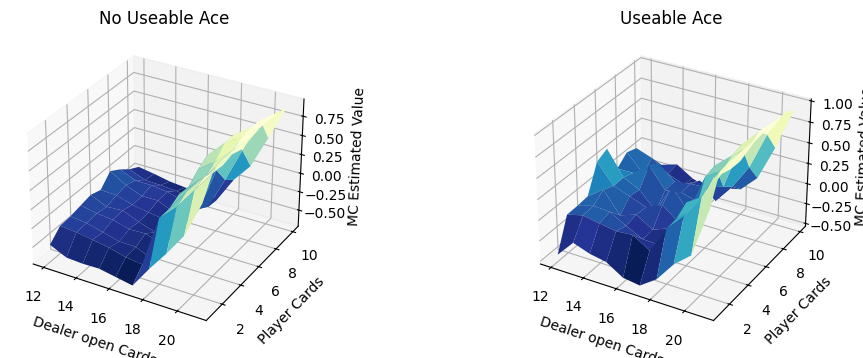

In [28]:
#시각화
X, Y = np.meshgrid(
    np.arange(12, 22),   # player가 가진 카드 합계 (12~21)
    np.arange(1, 11))    # dealer가 공개한 카드 (1~10)

#V[(player의 hand 합계, dealer 공개 카드, 사용 가능한 에이스 보유)]
no_usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], False)],
                                    2, np.dstack([X, Y]))
usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], True)],
                                 2, np.dstack([X, Y]))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4),
                               subplot_kw={'projection': '3d'})

ax0.plot_surface(X, Y, no_usable_ace, cmap=plt.cm.YlGnBu_r)
ax0.set_xlabel('Dealer open Cards')
ax0.set_ylabel('Player Cards')
ax0.set_zlabel('MC Estimated Value')
ax0.set_title('No Useable Ace')

ax1.plot_surface(X, Y, usable_ace, cmap=plt.cm.YlGnBu_r)
ax1.set_xlabel('Dealer open Cards')
ax1.set_ylabel('Player Cards')
ax1.set_zlabel('MC Estimated Value')
ax1.set_title('Useable Ace')

plt.show()

## Monte Carlo : blackjack control

In [29]:
win_cnt = 0
lose_cnt =0
draw_cnt = 0
GAMMMA = 1

e = 0.2
num_episodes = 100_000

In [30]:
env = gym.make("Blackjack-v1", sab = True)
num_actions = env.action_space.n 

In [31]:
##
pi = defaultdict(lambda: np.ones(num_actions, dtype = float)/num_actions)
Q = defaultdict(lambda: np.zeros(num_actions))
Returns = defaultdict(list)

In [32]:
for i in range(num_episodes):
    episode = []
    s, _ = env.reset()

    while True:
        P = pi[s]
        a = np.random.choice(np.arange(len(P)), p = P)
        s_, r, terminated, truncated, _ = env.step(a)
        episode.append((s, a, r))

        if terminated or truncated:
            if r == 1:
                win_cnt += 1
            elif r ==  -1:
                lose_cnt += 1
            else:
                draw_cnt += 1
            break
        s = s_

    G = 0
    visited_state_action_pair = []
    for s, a, r in episode[::-1]:
        G = GAMMMA*G + r

        if (s, a) not in visited_state_action_pair:
            Returns[(s, a)].append(G)
            Q[s][a] = np.mean(Returns[(s, a)])
            visited_state_action_pair.append((s, a))


        A_star = np.argmax(Q[s])

        for a in range(num_actions):
            if a == A_star:
                pi[s][a] = 1 - e + e/num_actions

            else:
                pi[s][a] = e/num_actions

    if i % 1000 == 0:
        print(f"{i}/{num_episodes} episode completed")


0/100000 episode completed
1000/100000 episode completed
2000/100000 episode completed
3000/100000 episode completed
4000/100000 episode completed
5000/100000 episode completed
6000/100000 episode completed
7000/100000 episode completed
8000/100000 episode completed
9000/100000 episode completed
10000/100000 episode completed
11000/100000 episode completed
12000/100000 episode completed
13000/100000 episode completed
14000/100000 episode completed
15000/100000 episode completed
16000/100000 episode completed
17000/100000 episode completed
18000/100000 episode completed
19000/100000 episode completed
20000/100000 episode completed
21000/100000 episode completed
22000/100000 episode completed
23000/100000 episode completed
24000/100000 episode completed
25000/100000 episode completed
26000/100000 episode completed
27000/100000 episode completed
28000/100000 episode completed
29000/100000 episode completed
30000/100000 episode completed
31000/100000 episode completed
32000/100000 episode 

In [33]:
print("승리 비율 = {:.2f}%".format(100*win_cnt/num_episodes))
print("패배 비율 = {:.2f}%".format(100*lose_cnt/num_episodes))
print("무승부 비율 = {:.2f}%".format(100*draw_cnt/num_episodes))

승리 비율 = 39.91%
패배 비율 = 52.61%
무승부 비율 = 7.49%


In [34]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value

In [35]:
sample_state = (17, 10, True)
optimal_action = np.argmax(Q[sample_state])
state_value = V[sample_state]

print(f"Optimal action = {optimal_action}")
print(f"State value = {state_value}")

Optimal action = 1
State value = -0.33860045146726864


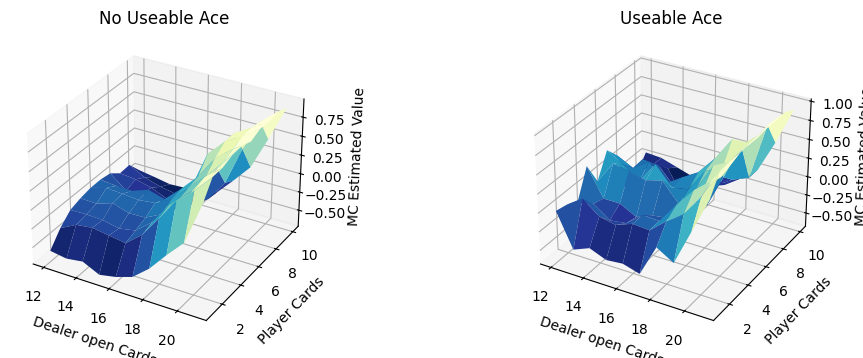

In [36]:
#시각화
X, Y = np.meshgrid(
    np.arange(12, 22),   # player가 가진 카드 합계 (12~21)
    np.arange(1, 11))    # dealer가 공개한 카드 (1~10)

#V[(player의 hand 합계, dealer 공개 카드, 사용 가능한 에이스 보유)]
no_usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], False)],
                                    2, np.dstack([X, Y]))
usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], True)],
                                 2, np.dstack([X, Y]))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4),
                               subplot_kw={'projection': '3d'})

ax0.plot_surface(X, Y, no_usable_ace, cmap=plt.cm.YlGnBu_r)
ax0.set_xlabel('Dealer open Cards')
ax0.set_ylabel('Player Cards')
ax0.set_zlabel('MC Estimated Value')
ax0.set_title('No Useable Ace')

ax1.plot_surface(X, Y, usable_ace, cmap=plt.cm.YlGnBu_r)
ax1.set_xlabel('Dealer open Cards')
ax1.set_ylabel('Player Cards')
ax1.set_zlabel('MC Estimated Value')
ax1.set_title('Useable Ace')

plt.show()